# Comparing Estimators

In [14]:
%matplotlib inline
from cbc.circuit_simulator import CircuitSimulator
from cbc.digital_estimator.digital_estimator import DigitalEstimator
from cbc.parallel_digital_estimator.digital_estimator import DigitalEstimator as ParallelDigitalEstimator
from cbc.analog_signal import AnalogSignal, Sinusodial
from cbc.analog_system import AnalogSystem
from cbc.digital_control import DigitalControl
from AnalogToDigital import Sin, System, Control, Simulator, WienerFilter
from matplotlib import pyplot as plt
import numpy as np

beta = 6250.0
rho = -6.25
N = 5
M = N
A = np.eye(N) * rho + np.eye(N, k=-1) * beta
B = np.zeros((N, 1))
B[0, 0] = beta
# B[0, 1] = -beta
C = np.eye(N)
Gamma_tilde = np.eye(M)
Gamma = Gamma_tilde * (-beta)
Ts = 1/(2 * beta)

amplitude = .76123514
frequency = 110.232
phase = np.pi/3*2.

eta2 = 1e4
K1 = 10000
K2 = 0
size = 10000
window = 1000
size_2 = size // 2
window_2 = window // 2
left_w = size_2 - window_2
right_w = size_2 + window_2

analogSystem = AnalogSystem(A, B, C, Gamma, Gamma_tilde)
analogSignals = [Sinusodial(amplitude, frequency, phase)]
# analogSignals = [AnalogSignal(0.25)]



In [15]:
tf_abs = np.abs(analogSystem.transfer_function(
    np.array([2 * np.pi * frequency])))
print(tf_abs, tf_abs.shape)


[[[9.02349496e+00]]

 [[8.14234614e+01]]

 [[7.34724193e+02]]

 [[6.62978006e+03]]

 [[5.98237870e+04]]] (5, 1, 1)


In [16]:
digitalControl1 = DigitalControl(Ts, M)
circuitSimulator1 = CircuitSimulator(
    analogSystem, digitalControl1, analogSignals)
estimator1 = DigitalEstimator(
    circuitSimulator1, analogSystem, digitalControl1, eta2, K1, K2)
digitalControl2 = DigitalControl(Ts, M)
circuitSimulator2 = CircuitSimulator(
    analogSystem, digitalControl2, analogSignals)
estimator2 = ParallelDigitalEstimator(
    circuitSimulator2, analogSystem, digitalControl1, eta2, K1, K2)
digitalControl4 = DigitalControl(Ts, M)
circuitSimulator4 = CircuitSimulator(
    analogSystem, digitalControl4, analogSignals)
estimator4 = DigitalEstimator(
    circuitSimulator4, analogSystem, digitalControl4, eta2, K1, K2, midPoint=True)

New Bf: [[-4.99726127e-01  4.15814458e-04  7.60436230e-04  8.27283194e-04
   3.54268603e-04]
 [-1.24303945e-01 -4.97591068e-01  4.88625136e-03  6.17070954e-03
   3.29605109e-03]
 [-1.91843255e-02 -1.18477119e-01 -4.84154010e-01  2.29300214e-02
   1.53094643e-02]
 [-1.59657758e-04 -1.01142181e-02 -9.53093298e-02 -4.48424176e-01
   4.54360431e-02]
 [ 1.42974842e-03  5.87062236e-03  7.64388209e-03 -5.95305747e-02
  -4.08184714e-01]]
New Bb: [[ 4.99973815e-01  4.23083064e-04 -7.73183693e-04  8.38013071e-04
  -3.55236075e-04]
 [-1.24375343e-01  4.97798552e-01  4.97084653e-03 -6.25418171e-03
   3.31179349e-03]
 [ 1.91707255e-02 -1.18446009e-01  4.84148708e-01  2.32235278e-02
  -1.53950192e-02]
 [-1.26468199e-04  9.97740850e-03 -9.50041802e-02  4.48133469e-01
   4.56812191e-02]
 [-1.44094148e-03  5.92763024e-03 -7.81961721e-03 -5.92327615e-02
   4.08025552e-01]]
tempAf New: [[  -10.57519052   -15.34605858   -33.49960052   -43.4277401
    -24.28547891]
 [ 6234.65394142   -83.90974592  -205.278

In [17]:
tf_1 = estimator1.transfer_function(np.array([2 * np.pi * frequency]))[0]
tf_2 = estimator2.transfer_function(np.array([2 * np.pi * frequency]))[0]
tf_4 = estimator4.transfer_function(np.array([2 * np.pi * frequency]))[0]

In [18]:
# Old Python Framework
input = Sin(Ts, amplitude, frequency, phase, B.flatten())
system = System(A, C)
ctrl = Control(Gamma, size)
simulator = Simulator(system, control=ctrl,
                      initalState=np.zeros(N), options={})
t = np.linspace(0, Ts * (size - 1), size)
result = simulator.simulate(t, (input,))
filter = WienerFilter(t, system, (input,), options={
                      "eta2": np.ones(N) * eta2})
e3 = filter.filter(ctrl)[0]
print(f"Olf Bf: {filter.Bf}")
print(f"Olf Bb: {filter.Bb}")

tempAf Old: [[  -10.57519052   -15.34605858   -33.49960052   -43.4277401
    -24.28547891]
 [ 6234.65394142   -83.90974592  -205.27890328  -311.80952864
   -212.65897007]
 [  -33.49960052  6044.72109672  -635.74193675 -1112.77056227
   -938.26305892]
 [  -43.4277401   -311.80952864  5137.22943773 -2364.40010706
  -2642.33112035]
 [  -24.28547891  -212.65897007  -938.26305892  3607.66887965
  -5012.09667979]]
tempAb Old: [[-1.86629526e+00 -1.56133066e+01  3.40851416e+01 -4.40427849e+01
   2.44231514e+01]
 [ 6.23438669e+03  7.28844683e+01 -2.09018674e+02  3.16403211e+02
  -2.14125376e+02]
 [ 3.40851416e+01  6.04098133e+03  6.34076439e+02 -1.12831162e+03
   9.44871341e+02]
 [-4.40427849e+01  3.16403211e+02  5.12168838e+03  2.37908091e+03
  -2.65871594e+03]
 [ 2.44231514e+01 -2.14125376e+02  9.44871341e+02  3.59128406e+03
   5.02254814e+03]]
10000
Olf Bf: [[-4.99725612e-01  4.16247385e-04  7.60484523e-04  8.26917002e-04
   3.55047814e-04]
 [-1.24300398e-01 -4.97587357e-01  4.88765177e-03  

In [19]:
e1_array = np.zeros(window)
e2_array = np.zeros(window)
e3_array = np.zeros(window)
e4_array = np.zeros(window)
input_array = np.zeros(window)
model_error = 0
e1_error = 0
e2_error = 0
e3_error = 0
e4_error = 0
window_index = 0
for index in range(size):
    e1 = estimator1.__next__()
    e2 = estimator2.__next__()
    e4 = estimator4.__next__()
    t_temp = index * Ts
    u = analogSignals[0].evaluate(t_temp)
    if (index >= left_w and index < right_w):
        print(
            f"Time: {t_temp:0.2f}, Input Signal: {u * tf_2}, e1: {e1}, e2: {e2}, e3: {e3[index]}, e4: {e4}")
        e1_error += np.abs(e1 - u * tf_1)**2
        e2_error += np.abs(e2 - u * tf_2)**2
        e3_error += np.abs(e3[index] - u * tf_1)**2
        e4_error += np.abs(e4 - u * tf_4)**2
        e1_array[window_index] = e1
        e2_array[window_index] = e2
        e3_array[window_index] = e3[index]
        e4_array[window_index] = e4
        input_array[window_index] = u * tf_2
        window_index += 1
e1_error /= window
e2_error /= window
e3_error /= window
e4_error /= window
print(
    f"Quadratic estimator error:    {e1_error}, {10 * np.log10(e1_error)} dB")
print(
    f"Linear estimator error:       {e2_error}, {10 * np.log10(e2_error)} dB")
print(
    f"Python estimator error:       {e3_error}, {10 * np.log10(e3_error)} dB")
print(
    f"MidPoint estimator error:     {e4_error}, {10 * np.log10(e4_error)} dB")

Time: 0.36, Input Signal: [0.08045839], e1: [0.1184976], e2: [0.16000254], e3: [0.14276814], e4: [0.13930166]
Time: 0.36, Input Signal: [0.12225609], e1: [0.16000254], e2: [0.20100648], e3: [0.18394404], e4: [0.18057872]
Time: 0.36, Input Signal: [0.16367854], e1: [0.20100648], e2: [0.24137674], e3: [0.2245661], e4: [0.22127527]
Time: 0.36, Input Signal: [0.20459861], e1: [0.24137674], e2: [0.28098975], e3: [0.26451464], e4: [0.26128942]
Time: 0.36, Input Signal: [0.2448907], e1: [0.28098975], e2: [0.3196909], e3: [0.30366258], e4: [0.30046133]
Time: 0.36, Input Signal: [0.28443114], e1: [0.3196909], e2: [0.35739755], e3: [0.34187086], e4: [0.33867236]
Time: 0.36, Input Signal: [0.32309856], e1: [0.35739755], e2: [0.39399665], e3: [0.37905549], e4: [0.37584527]
Time: 0.36, Input Signal: [0.36077429], e1: [0.39399665], e2: [0.42936177], e3: [0.41509627], e4: [0.41183994]
Time: 0.36, Input Signal: [0.39734267], e1: [0.42936177], e2: [0.46341446], e3: [0.44985595], e4: [0.44655497]
Time: 

Time: 0.39, Input Signal: [0.16647655], e1: [0.12915411], e2: [0.08740366], e3: [0.1043319], e4: [0.10831612]
Time: 0.39, Input Signal: [0.12508422], e1: [0.08740366], e2: [0.0453917], e3: [0.06243127], e4: [0.06642531]
Time: 0.39, Input Signal: [0.08330797], e1: [0.0453917], e2: [0.00324841], e3: [0.0203351], e4: [0.02432589]
Time: 0.39, Input Signal: [0.04127602], e1: [0.00324841], e2: [-0.03890908], e3: [-0.02182473], e4: [-0.01783321]
Time: 0.39, Input Signal: [-0.00088262], e1: [-0.03890908], e2: [-0.08094853], e3: [-0.06392325], e4: [-0.05995543]
Time: 0.39, Input Signal: [-0.04303855], e1: [-0.08094853], e2: [-0.12273729], e3: [-0.10582913], e4: [-0.10187842]
Time: 0.39, Input Signal: [-0.08506238], e1: [-0.12273729], e2: [-0.16415553], e3: [-0.14741805], e4: [-0.14350409]
Time: 0.39, Input Signal: [-0.12682512], e1: [-0.16415553], e2: [-0.205074], e3: [-0.18855922], e4: [-0.18468149]
Time: 0.39, Input Signal: [-0.1681986], e1: [-0.205074], e2: [-0.24537212], e3: [-0.22912866], 

Time: 0.42, Input Signal: [-0.52908847], e1: [-0.50102009], e2: [-0.46863607], e3: [-0.48167879], e4: [-0.4850136]
Time: 0.42, Input Signal: [-0.49796666], e1: [-0.46863607], e2: [-0.43481433], e3: [-0.44833645], e4: [-0.45189949]
Time: 0.42, Input Signal: [-0.46531643], e1: [-0.43481433], e2: [-0.39964656], e3: [-0.41363171], e4: [-0.417392]
Time: 0.42, Input Signal: [-0.43123799], e1: [-0.39964656], e2: [-0.36327027], e3: [-0.37764394], e4: [-0.38159907]
Time: 0.42, Input Signal: [-0.39583593], e1: [-0.36327027], e2: [-0.32579462], e3: [-0.34048517], e4: [-0.34466717]
Time: 0.42, Input Signal: [-0.35921892], e1: [-0.32579462], e2: [-0.28729143], e3: [-0.3022874], e4: [-0.30666451]
Time: 0.42, Input Signal: [-0.32149935], e1: [-0.28729143], e2: [-0.24790257], e3: [-0.26316643], e4: [-0.26769693]
Time: 0.42, Input Signal: [-0.28279299], e1: [-0.24790257], e2: [-0.20774635], e3: [-0.22320936], e4: [-0.22791689]
Time: 0.42, Input Signal: [-0.24321865], e1: [-0.20774635], e2: [-0.1669046]

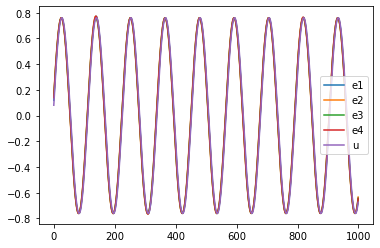

In [20]:
%matplotlib inline
plt.plot(e1_array, label='e1')
plt.plot(e2_array, label='e2')
plt.plot(e3_array, label='e3')
plt.plot(e4_array, label='e4')
plt.plot(input_array, label="u")
plt.legend()


In [21]:
from scipy.linalg import expm, solve
from scipy.integrate import solve_ivp
def derivative(t, x):
    temp_pow = expm(A * (Ts - t))
    temp = np.dot(C,temp_pow)
    return temp.flatten()

solonesided = solve_ivp(derivative, (0, Ts), np.zeros(N * N))
A_generic = solonesided.y[:,-1].reshape((N,N))
print(A_generic)

[[7.99800033e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.99933346e-05 7.99800033e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.33208358e-06 1.99933346e-05 7.99800033e-05 0.00000000e+00
  0.00000000e+00]
 [4.16500035e-07 3.33208358e-06 1.99933346e-05 7.99800033e-05
  0.00000000e+00]
 [4.16492900e-08 4.16500035e-07 3.33208358e-06 1.99933346e-05
  7.99800033e-05]]


In [22]:
from scipy.linalg import expm, solve
from scipy.integrate import solve_ivp
def derivative(t, x):
    temp_pow = expm(A * (Ts - t))
    temp = np.dot(C,np.dot(temp_pow, B)) * np.sqrt(Ts)
    res = np.dot(temp, temp.transpose())
    return res.flatten()

In [11]:
sol = solve_ivp(derivative, (0, Ts), np.zeros(N * N))

In [12]:
print(sol)
cov = (sol.y[:,-1].reshape((N,N)) + sol.y[:,-1].reshape((N,N)).transpose()) / 2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 8
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.e+00, 8.e-05])
 t_events: None
        y: array([[0.00000000e+00, 2.50000000e-01],
       [0.00000000e+00, 6.25000000e-02],
       [0.00000000e+00, 1.04166667e-02],
       [0.00000000e+00, 1.30208333e-03],
       [0.00000000e+00, 1.30208333e-04],
       [0.00000000e+00, 1.08627508e-05],
       [0.00000000e+00, 7.81462102e-07],
       [0.00000000e+00, 6.25000000e-02],
       [0.00000000e+00, 2.08333333e-02],
       [0.00000000e+00, 3.90625000e-03],
       [0.00000000e+00, 5.20833333e-04],
       [0.00000000e+00, 5.43137539e-05],
       [0.00000000e+00, 4.68877261e-06],
       [0.00000000e+00, 3.47630860e-07],
       [0.00000000e+00, 1.04166667e-02],
       [0.00000000e+00, 3.90625000e-03],
       [0.00000000e+00, 7.81250000e-04],
       [0.00000000e+00, 1.08627508e-04],
       [0.00000000e+00, 1.17219315

In [13]:
print(cov)
chol = np.linalg.cholesky(cov)
chol_inv = np.linalg.inv(chol)
print(chol)
print(chol_inv)

[[2.50000000e-01 6.25000000e-02 1.04166667e-02 1.30208333e-03
  1.30208333e-04 1.08627508e-05 7.81462102e-07]
 [6.25000000e-02 2.08333333e-02 3.90625000e-03 5.20833333e-04
  5.43137539e-05 4.68877261e-06 3.47630860e-07]
 [1.04166667e-02 3.90625000e-03 7.81250000e-04 1.08627508e-04
  1.17219315e-05 1.04289258e-06 7.93762689e-08]
 [1.30208333e-03 5.20833333e-04 1.08627508e-04 1.56292420e-05
  1.73815430e-06 1.58752538e-07 1.23510822e-08]
 [1.30208333e-04 5.43137539e-05 1.17219315e-05 1.73815430e-06
  1.98440672e-07 1.85266233e-08 1.46704375e-09]
 [1.08627508e-05 4.68877261e-06 1.04289258e-06 1.58752538e-07
  1.85266233e-08 1.76045250e-09 1.41325656e-10]
 [7.81462102e-07 3.47630860e-07 7.93762689e-08 1.23510822e-08
  1.46704375e-09 1.41325656e-10 1.14633825e-11]]


LinAlgError: Matrix is not positive definite

In [ ]:
BigA = np.kron(np.eye(N), A_generic)
BigY = -chol.flatten('F')
Gamma = np.linalg.solve(BigA, BigY).reshape((N,N), order='F')


In [ ]:
print(BigA)

In [ ]:
print(BigY)

In [ ]:
print(Gamma)
print(B)

In [ ]:
print(np.dot(A_generic, B))
print(np.dot(A_generic, Gamma))
print(chol)

In [ ]:
Gamma_tilde = chol_inv
print(Gamma_tilde)

In [ ]:
Gamma_tilde = np.linalg.inv(np.dot(A_generic, -Gamma))
print(Gamma_tilde)

In [ ]:
# Really stupid
np.linalg.solve(A_generic, beta * Ts * np.ones(N))